In [1]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [ ]:
# The following command removes the H2O module for Python.
!pip uninstall h2o

# Next, use pip to install this version of the H2O Python module.
!pip install https://h2o-release.s3.amazonaws.com/h2o/master/4698/Python/h2o-3.25.0.4698-py2.py3-none-any.whl

In [38]:
import h2o
h2o.init(nthreads = -1, max_mem_size = 8)
h2o.connect()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,3 days 3 hours 42 mins
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.25.0.4698
H2O cluster version age:,8 months and 27 days !!!
H2O cluster name:,H2O_from_python_User_136w9o
H2O cluster total nodes:,1
H2O cluster free memory:,6.898 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


Connecting to H2O server at http://localhost:54321 ... successful.


H2O cluster uptime:,3 days 3 hours 42 mins
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.25.0.4698
H2O cluster version age:,8 months and 27 days !!!
H2O cluster name:,H2O_from_python_User_136w9o
H2O cluster total nodes:,1
H2O cluster free memory:,6.898 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


<H2OConnection to http://localhost:54321, no session>

In [ ]:
#Import Data

In [39]:
import pandas as pd
data_1=pd.read_csv("bank-additional-full.csv",sep=";")
data_2=pd.read_csv("bank-additional.csv",sep=";")
data=pd.concat([data_1,data_2],axis=0)

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [40]:
#To avoid mulicorinality drop the higly correltaed column
data = data.drop(["emp.var.rate","nr.employed"],axis=1)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,4.857,no


In [41]:
#label encoding


jobDummies = pd.get_dummies(data['job'], prefix = 'job')
maritalDummies = pd.get_dummies(data['marital'], prefix = 'marital')
educationDummies = pd.get_dummies(data['education'], prefix = 'education')
defaultDummies = pd.get_dummies(data['default'], prefix = 'default')
housingDummies = pd.get_dummies(data['housing'], prefix = 'housing')
loanDummies = pd.get_dummies(data['loan'], prefix = 'loan')
contactDummies = pd.get_dummies(data['contact'], prefix = 'contact')
poutcomeDummies = pd.get_dummies(data['poutcome'], prefix = 'poutcome')
data['month']=data['month'].astype('category')
data['day_of_week']=data['day_of_week'].astype('category')
data['y']=data['y'].astype('category')

# Assigning numerical values and storing in another column
data['month'] = data['month'].cat.codes
data['day_of_week'] = data['day_of_week'].cat.codes
data['y'] = data['y'].cat.codes

data['y'].dtype

dtype('int8')

In [42]:
data["age"]=data["age"].astype("int")
data["duration"]=data["duration"].astype("int")
data["pdays"]=data["pdays"].astype("int")
data["previous"]=data["previous"].astype("int")
data["campaign"]=data["campaign"].astype("int")

data_int=data.select_dtypes(include=['int','float64','bool'])
#data_int
bank_df=pd.concat([data_int,jobDummies,maritalDummies,educationDummies,defaultDummies,housingDummies,loanDummies
                  ,contactDummies,poutcomeDummies,data['month'],data['day_of_week'],data['y']],axis=1)
bank_df.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,...,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,month,day_of_week,y
0,56,261,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,1,0,1,0,6,1,0
1,57,149,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,1,0,1,0,6,1,0
2,37,226,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,1,0,1,0,6,1,0
3,40,151,1,999,0,93.994,-36.4,4.857,1,0,...,0,0,0,1,0,1,0,6,1,0
4,56,307,1,999,0,93.994,-36.4,4.857,0,0,...,0,1,0,1,0,1,0,6,1,0


In [43]:
features = bank_df.columns
features=features[:48]
print(features)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success', 'month', 'day_of_week'],
      dtype='object')


In [ ]:
#Convert to H2O Frame before running H2O algorithm

In [45]:
data = h2o.H2OFrame(bank_df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
#Predictor & Features Labels

In [46]:
y="y"
X=list(data.columns).remove(y)


In [47]:
data[y] = data[y].asfactor()
data[y].type


y
0
0
0
0
0
0
0
0
0
0


<bound method H2OFrame.type of >

In [ ]:
#Train/Val/Test split

In [48]:
splits = data.split_frame(ratios=[0.6, 0.2], seed=1)
sgemm_train = splits[0]
sgemm_val = splits[1]
sgemm_test = splits[2]

In [ ]:
#Run RandomForest Estimator

In [49]:

from h2o.estimators.random_forest import H2ORandomForestEstimator
nFolds=5
rf = H2ORandomForestEstimator(nfolds = nFolds, fold_assignment = "Modulo",keep_cross_validation_predictions = True,

                                   min_rows = 4, ntrees = 100, max_depth = 9, balance_classes=True,

                                   stopping_metric = 'AUC', stopping_rounds = 3, stopping_tolerance = 1e-4, score_tree_interval = 10, seed = 1)

#rf.train(x = X, y = y, training_frame = sgemm_train)

#rf.model_performance().auc()

In [50]:
rf.train(x=X, y=y, training_frame=sgemm_train)


drf Model Build progress: |███████████████████████████████████████████████| 100%


In [51]:
y_pred_test = rf.predict(test_data=sgemm_test)


drf prediction progress: |████████████████████████████████████████████████| 100%


In [52]:
rf_performance_test = rf.model_performance(sgemm_test)
print(rf_performance_test)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.06730224029646713
RMSE: 0.2594267532396517
LogLoss: 0.2124928744382244
Mean Per-Class Error: 0.12643039631036634
AUC: 0.9351779753130091
pr_auc: 0.6062681130240294
Gini: 0.8703559506260181
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1945159505156305: 


,0,1,Error,Rate
0,7398.0,600.0,0.075,(600.0/7998.0)
1,290.0,711.0,0.2897,(290.0/1001.0)
Total,7688.0,1311.0,0.0989,(890.0/8999.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1945160,0.6150519,208.0
max f2,0.1555361,0.7369134,242.0
max f0point5,0.2673246,0.5821095,158.0
max accuracy,0.2991906,0.9099900,142.0
max precision,0.8831934,1.0,0.0
max recall,0.0159199,1.0,379.0
max specificity,0.8831934,1.0,0.0
max absolute_mcc,0.1569812,0.5715146,241.0
max min_per_class_accuracy,0.1544051,0.8692173,243.0
max mean_per_class_accuracy,0.0998928,0.8735696,282.0


Gains/Lift Table: Avg response rate: 11.12 %, avg score:  8.88 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100011,0.7398680,7.0921190,7.0921190,0.7888889,0.8031387,0.7888889,0.8031387,0.0709291,0.0709291,609.2118992,609.2118992
,2,0.0200022,0.4998869,6.6925630,6.8923410,0.7444444,0.6336150,0.7666667,0.7183768,0.0669331,0.1378621,569.2562993,589.2340992
,3,0.0300033,0.4264986,6.2930070,6.6925630,0.7,0.4606480,0.7444444,0.6324672,0.0629371,0.2007992,529.3006993,569.2562993
,4,0.0400044,0.3855018,5.7935620,6.4678127,0.6444444,0.4063030,0.7194444,0.5759262,0.0579421,0.2587413,479.3561994,546.7812743
,5,0.0500056,0.3525477,4.5948940,6.0932290,0.5111111,0.3673800,0.6777778,0.5342169,0.0459540,0.3046953,359.4893995,509.3228993
,6,0.1000111,0.2343382,4.3751382,5.2341836,0.4866667,0.2786492,0.5822222,0.4064331,0.2187812,0.5234765,337.5138195,423.4183594
,7,0.1500167,0.1911360,3.9156488,4.7946720,0.4355556,0.2092594,0.5333333,0.3407085,0.1958042,0.7192807,291.5648796,379.4671995
,8,0.2000222,0.1621209,2.3973360,4.1953380,0.2666667,0.1768440,0.4666667,0.2997424,0.1198801,0.8391608,139.7335997,319.5337995
,9,0.3000333,0.0794204,1.1087679,3.1664813,0.1233333,0.1229369,0.3522222,0.2408072,0.1108891,0.9500500,10.8767899,216.6481296
,10,0.4000444,0.0381045,0.3695893,2.4672583,0.0411111,0.0552097,0.2744444,0.1944078,0.0369630,0.9870130,-63.0410700,146.7258297


In [53]:
rf_performance_test.auc()


0.9351779753130091

In [54]:
rf_performance_test.confusion_matrix()

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1945159505156305: 


,0,1,Error,Rate
0,7398.0,600.0,0.075,(600.0/7998.0)
1,290.0,711.0,0.2897,(290.0/1001.0)
Total,7688.0,1311.0,0.0989,(890.0/8999.0)


In [55]:
rf.cross_validation_metrics_summary()

Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.9005097,0.0037365,0.9009174,0.9025688,0.9058716,0.9027523,0.8904386
auc,0.9418222,0.0021461,0.9417889,0.9419993,0.94603,0.9365764,0.9427162
err,0.0994903,0.0037365,0.0990826,0.0974312,0.0941284,0.0972477,0.1095614
err_count,542.2,20.334208,540.0,531.0,513.0,530.0,597.0
f0point5,0.5774313,0.0122874,0.5821832,0.5944625,0.5954142,0.5639943,0.5511022
f1,0.6338597,0.0143904,0.6321526,0.6580811,0.653144,0.6021021,0.6238185
f2,0.7032196,0.0228461,0.6915052,0.7369484,0.7232704,0.6457327,0.7186411
lift_top_group,7.9370065,0.1277882,8.034398,7.92106,7.8313785,8.215659,7.682538
logloss,0.2084370,0.0026617,0.2135148,0.2122078,0.2058394,0.2038021,0.2068212
max_per_class_error,0.2408321,0.0327839,0.2623211,0.1990596,0.2209677,0.321489,0.2003231


In [56]:
#Validation
rf_performance_val = rf.model_performance(sgemm_val)
print(rf_performance_val)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.0645182890688343
RMSE: 0.2540045060010438
LogLoss: 0.2032074331648834
Mean Per-Class Error: 0.1094523803994687
AUC: 0.9429613792955349
pr_auc: 0.6301006161148923
Gini: 0.8859227585910698
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1738780260359314: 


,0,1,Error,Rate
0,7298.0,768.0,0.0952,(768.0/8066.0)
1,179.0,814.0,0.1803,(179.0/993.0)
Total,7477.0,1582.0,0.1045,(947.0/9059.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1738780,0.6322330,228.0
max f2,0.1450865,0.7575503,253.0
max f0point5,0.2908104,0.5911824,157.0
max accuracy,0.2908104,0.9125731,157.0
max precision,0.8781215,1.0,0.0
max recall,0.0159726,1.0,379.0
max specificity,0.8781215,1.0,0.0
max absolute_mcc,0.1639153,0.5988703,235.0
max min_per_class_accuracy,0.1553681,0.8802380,243.0
max mean_per_class_accuracy,0.0923998,0.8905476,291.0


Gains/Lift Table: Avg response rate: 10.96 %, avg score:  8.82 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100453,0.7510973,8.3208503,8.3208503,0.9120879,0.8075694,0.9120879,0.8075694,0.0835851,0.0835851,732.0850348,732.0850348
,2,0.0200905,0.5644248,6.3158262,7.3183383,0.6923077,0.6685076,0.8021978,0.7380385,0.0634441,0.1470292,531.5826168,631.8338258
,3,0.0300254,0.4489037,6.0819067,6.9092249,0.6666667,0.4931081,0.7573529,0.6569954,0.0604230,0.2074522,508.1906680,590.9224868
,4,0.0400706,0.3944385,6.0150725,6.6850710,0.6593407,0.4210915,0.7327824,0.5978569,0.0604230,0.2678751,501.5072541,568.5070979
,5,0.0500055,0.3574551,4.5614300,6.2631556,0.5,0.3765821,0.6865342,0.5538950,0.0453172,0.3131923,356.1430010,526.3155555
,6,0.1000110,0.2266368,4.3902505,5.3267030,0.4812362,0.2796958,0.5838852,0.4167954,0.2195368,0.5327291,339.0250517,432.6703036
,7,0.1500166,0.1880595,4.0680303,4.9071455,0.4459161,0.2052236,0.5378955,0.3462715,0.2034240,0.7361531,306.8030296,390.7145456
,8,0.2000221,0.1570817,2.8194269,4.3852158,0.3090508,0.1727841,0.4806843,0.3028996,0.1409869,0.8771400,181.9426938,338.5215826
,9,0.3000331,0.0737572,1.0170076,3.2624797,0.1114790,0.1155896,0.3576159,0.2404630,0.1017120,0.9788520,1.7007574,226.2479742
,10,0.4000442,0.0366186,0.1309020,2.4795853,0.0143488,0.0519293,0.2717991,0.1933295,0.0130916,0.9919436,-86.9098035,147.9585298


In [57]:
#Training
rf_performance_train = rf.model_performance(sgemm_train)
print(rf_performance_train)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.060192564435650825
RMSE: 0.2453417299108548
LogLoss: 0.19165023894780545
Mean Per-Class Error: 0.0944364520345422
AUC: 0.9580233860611349
pr_auc: 0.7413095493278182
Gini: 0.9160467721222698
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.18918525035832445: 


,0,1,Error,Rate
0,22498.0,1654.0,0.0685,(1654.0/24152.0)
1,583.0,2514.0,0.1882,(583.0/3097.0)
Total,23081.0,4168.0,0.0821,(2237.0/27249.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1891853,0.6920853,224.0
max f2,0.1611971,0.7976742,245.0
max f0point5,0.3568276,0.6724464,136.0
max accuracy,0.2602775,0.9221256,179.0
max precision,0.8978312,1.0,0.0
max recall,0.0104883,1.0,394.0
max specificity,0.8978312,1.0,0.0
max absolute_mcc,0.1751229,0.6578880,235.0
max min_per_class_accuracy,0.1645631,0.9014574,243.0
max mean_per_class_accuracy,0.1527404,0.9055635,251.0


Gains/Lift Table: Avg response rate: 11.37 %, avg score:  9.05 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100554,0.7780793,8.6379579,8.6379579,0.9817518,0.8289390,0.9817518,0.8289390,0.0868582,0.0868582,763.7957854,763.7957854
,2,0.0200007,0.6022164,7.9543768,8.2980487,0.9040590,0.7018622,0.9431193,0.7657503,0.0791088,0.1659671,695.4376751,729.8048718
,3,0.0300195,0.4696816,7.3804391,7.9918049,0.8388278,0.5249936,0.9083130,0.6854000,0.0739425,0.2399096,638.0439064,699.1804909
,4,0.0400015,0.4141145,6.7929709,7.6926463,0.7720588,0.4384319,0.8743119,0.6237712,0.0678076,0.3077171,579.2970902,669.2646331
,5,0.0500202,0.3718372,5.7367605,7.3008952,0.6520147,0.3910702,0.8297872,0.5771627,0.0574750,0.3651921,473.6760495,630.0895170
,6,0.1000037,0.2386486,4.5478373,5.9248714,0.5168869,0.2921391,0.6733945,0.4347032,0.2273168,0.5925089,354.7837256,492.4871361
,7,0.1500239,0.1907203,4.1378195,5.3290417,0.4702861,0.2109683,0.6056751,0.3601067,0.2069745,0.7994834,313.7819455,432.9041677
,8,0.2000073,0.1568238,2.3643586,4.5881429,0.2687225,0.1739913,0.5214679,0.3135949,0.1181789,0.9176623,136.4358574,358.8142891
,9,0.3000110,0.0755312,0.6425337,3.2729398,0.0730275,0.1155884,0.3719878,0.2475927,0.0642557,0.9819180,-35.7466267,227.2939838
,10,0.4000147,0.0369621,0.1388389,2.4894146,0.0157798,0.0530806,0.2829358,0.1989647,0.0138844,0.9958024,-86.1161053,148.9414616


In [ ]:
##Run Gradient Boosting Estimator

In [58]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

nFolds = 5

sampleRatePerClass = [0.62, 1]

gbm = H2OGradientBoostingEstimator(nfolds = nFolds, fold_assignment = "Modulo",keep_cross_validation_predictions = True,

                                   min_rows = 4, ntrees = 50, max_depth = 9, learn_rate = 0.01, balance_classes=True,

                                   stopping_metric = 'AUC', stopping_rounds = 3, stopping_tolerance = 1e-4, score_tree_interval = 10, seed = 1)

gbm.train(x = X, y = y, training_frame = sgemm_train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [59]:
y_pred_test = gbm.predict(test_data=sgemm_test)


gbm prediction progress: |████████████████████████████████████████████████| 100%


In [68]:
gbm_performance_test = gbm.model_performance(sgemm_test)
print(gbm_performance_test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.0820767246739819
RMSE: 0.2864903570348955
LogLoss: 0.2673459710691966
Mean Per-Class Error: 0.1273081132420968
AUC: 0.9312871424649369
pr_auc: 0.6004929031259688
Gini: 0.8625742849298739
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.17367161887176197: 


,0,1,Error,Rate
0,7465.0,533.0,0.0666,(533.0/7998.0)
1,328.0,673.0,0.3277,(328.0/1001.0)
Total,7793.0,1206.0,0.0957,(861.0/8999.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1736716,0.6098777,122.0
max f2,0.0911105,0.7251787,278.0
max f0point5,0.1929339,0.6039489,83.0
max accuracy,0.1936902,0.9125458,81.0
max precision,0.2276708,1.0,0.0
max recall,0.0524031,1.0,394.0
max specificity,0.2276708,1.0,0.0
max absolute_mcc,0.1601824,0.5607819,148.0
max min_per_class_accuracy,0.1171515,0.8581419,227.0
max mean_per_class_accuracy,0.0765197,0.8726919,306.0


Gains/Lift Table: Avg response rate: 11.12 %, avg score:  8.47 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100011,0.2231037,6.8923410,6.8923410,0.7666667,0.2245151,0.7666667,0.2245151,0.0689311,0.0689311,589.2340992,589.2340992
,2,0.0200022,0.2162128,7.1920080,7.0421745,0.8,0.2197475,0.7833333,0.2221313,0.0719281,0.1408591,619.2007992,604.2174492
,3,0.0300033,0.2115601,6.3928960,6.8257483,0.7111111,0.2138939,0.7592593,0.2193855,0.0639361,0.2047952,539.2895993,582.5748326
,4,0.0400044,0.2079670,5.5937840,6.5177572,0.6222222,0.2095273,0.725,0.2169210,0.0559441,0.2607393,459.3783994,551.7757243
,5,0.0500056,0.2058532,5.2941170,6.2730292,0.5888889,0.2067769,0.6977778,0.2148922,0.0529471,0.3136863,429.4116994,527.3029193
,6,0.1002334,0.1914333,4.7336778,5.5016469,0.5265487,0.1979422,0.6119734,0.2063984,0.2377622,0.5514486,373.3677827,450.1646912
,7,0.1501278,0.1627535,3.2636339,4.7578513,0.3630290,0.1781944,0.5292376,0.1970249,0.1628372,0.7142857,226.3633916,375.7851327
,8,0.2001333,0.1282978,2.2774692,4.1381001,0.2533333,0.1470592,0.4602998,0.1845404,0.1138861,0.8281718,127.7469197,313.8100101
,9,0.3001445,0.0688672,1.2386236,3.1719658,0.1377778,0.0960549,0.3528323,0.1550561,0.1238761,0.9520480,23.8623599,217.1965761
,10,0.4013779,0.0570671,0.3059169,2.4491057,0.0340285,0.0610930,0.2724252,0.1313573,0.0309690,0.9830170,-69.4083085,144.9105712


In [61]:
#training
gbm_performance_train = gbm.model_performance(sgemm_train)
print(gbm_performance_train)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.07963628459815414
RMSE: 0.28219901594115127
LogLoss: 0.2538429397759908
Mean Per-Class Error: 0.07088086265191829
AUC: 0.9728722918128144
pr_auc: 0.8076223106149941
Gini: 0.9457445836256289
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.17069334548983378: 


,0,1,Error,Rate
0,22889.0,1263.0,0.0523,(1263.0/24152.0)
1,515.0,2582.0,0.1663,(515.0/3097.0)
Total,23404.0,3845.0,0.0653,(1778.0/27249.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1706933,0.7438778,134.0
max f2,0.1337526,0.8352422,194.0
max f0point5,0.1933618,0.7490368,84.0
max accuracy,0.1924941,0.9389702,86.0
max precision,0.2278123,1.0,0.0
max recall,0.0539005,1.0,384.0
max specificity,0.2278123,1.0,0.0
max absolute_mcc,0.1706933,0.7124204,134.0
max min_per_class_accuracy,0.1456300,0.9205683,176.0
max mean_per_class_accuracy,0.1241338,0.9291191,212.0


Gains/Lift Table: Avg response rate: 11.37 %, avg score:  8.41 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100187,0.2237589,8.7018277,8.7018277,0.9890110,0.2251345,0.9890110,0.2251345,0.0871811,0.0871811,770.1827717,770.1827717
,2,0.0200007,0.2196028,8.1515651,8.4272012,0.9264706,0.2222747,0.9577982,0.2237072,0.0813691,0.1685502,715.1565082,742.7201228
,3,0.0305699,0.2141266,8.0958555,8.3126423,0.9201389,0.2165223,0.9447779,0.2212231,0.0855667,0.2541169,709.5855532,731.2642332
,4,0.0400015,0.2098436,7.4290961,8.1043200,0.8443580,0.2119015,0.9211009,0.2190252,0.0700678,0.3241847,642.9096063,710.4319954
,5,0.0500202,0.2066941,6.4780273,7.7785842,0.7362637,0.2082546,0.8840792,0.2168680,0.0649015,0.3890862,547.8027300,677.8584155
,6,0.1021322,0.1914333,5.5145620,6.6233878,0.6267606,0.1987144,0.7527848,0.2076053,0.2873749,0.6764611,451.4562025,562.3387811
,7,0.1500606,0.1616281,3.7525059,5.7064468,0.4264931,0.1786000,0.6485693,0.1983412,0.1798515,0.8563126,275.2505883,470.6446799
,8,0.2000073,0.1257596,2.0816471,4.8012445,0.2365907,0.1441684,0.5456881,0.1848129,0.1039716,0.9602841,108.1647120,380.1244531
,9,0.3000844,0.0661754,0.3420031,3.3141036,0.0388706,0.0905404,0.3766663,0.1533733,0.0342267,0.9945108,-65.7996862,231.4103614
,10,0.4008220,0.0563075,0.0352582,2.4900393,0.0040073,0.0601042,0.2830068,0.1299322,0.0035518,0.9980626,-96.4741835,149.0039270


In [69]:
#Validation
gbm_performance_val = gbm.model_performance(sgemm_val)
print(gbm_performance_val)



ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.08029278381201918
RMSE: 0.28335981333283516
LogLoss: 0.2613505041448234
Mean Per-Class Error: 0.11367965293378979
AUC: 0.9398105109183577
pr_auc: 0.6298729100642323
Gini: 0.8796210218367153
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.16718959253662194: 


,0,1,Error,Rate
0,7502.0,564.0,0.0699,(564.0/8066.0)
1,282.0,711.0,0.284,(282.0/993.0)
Total,7784.0,1275.0,0.0934,(846.0/9059.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1671896,0.6269841,133.0
max f2,0.0845929,0.7452229,289.0
max f0point5,0.1974424,0.6201342,69.0
max accuracy,0.1974424,0.9169886,69.0
max precision,0.2239889,0.8478261,9.0
max recall,0.0485327,1.0,399.0
max specificity,0.2278738,0.9997520,0.0
max absolute_mcc,0.1394514,0.5850994,178.0
max min_per_class_accuracy,0.1188016,0.8710977,219.0
max mean_per_class_accuracy,0.0838190,0.8863203,291.0


Gains/Lift Table: Avg response rate: 10.96 %, avg score:  8.36 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100453,0.2239794,7.7193431,7.7193431,0.8461538,0.2251261,0.8461538,0.2251261,0.0775428,0.0775428,671.9343094,671.9343094
,2,0.0200905,0.2189967,6.9173334,7.3183383,0.7582418,0.2218835,0.8021978,0.2235048,0.0694864,0.1470292,591.7333422,631.8338258
,3,0.0300254,0.2132906,6.0819067,6.9092249,0.6666667,0.2156636,0.7573529,0.2209103,0.0604230,0.2074522,508.1906680,590.9224868
,4,0.0400706,0.2082251,6.2155750,6.7353347,0.6813187,0.2105485,0.7382920,0.2183127,0.0624371,0.2698892,521.5574959,573.5334671
,5,0.0500055,0.2054910,6.4873671,6.6860696,0.7111111,0.2069091,0.7328918,0.2160471,0.0644512,0.3343404,548.7367125,568.6069595
,6,0.1000110,0.1907486,4.6319157,5.6589926,0.5077263,0.1977531,0.6203091,0.2069001,0.2316213,0.5659617,363.1915684,465.8992639
,7,0.1505685,0.1598381,3.4459711,4.9159106,0.3777293,0.1756331,0.5388563,0.1964014,0.1742195,0.7401813,244.5971143,391.5910641
,8,0.2000221,0.1248385,2.3418056,4.2794873,0.2566964,0.1406583,0.4690949,0.1826194,0.1158107,0.8559919,134.1805586,327.9487316
,9,0.3001435,0.0656010,1.0762360,3.2109515,0.1179713,0.0902294,0.3519676,0.1518001,0.1077543,0.9637462,7.6235967,221.0951467
,10,0.4035766,0.0561863,0.2531423,2.4528915,0.0277481,0.0597643,0.2688731,0.1282121,0.0261833,0.9899295,-74.6857673,145.2891521


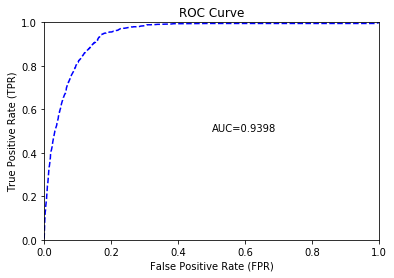

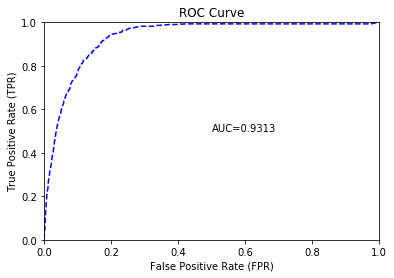

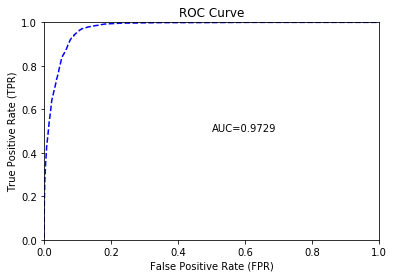

In [63]:
#Plot AUC-ROC
gbm_performance_val.plot()
gbm_performance_test.plot()
gbm_performance_train.plot()

In [ ]:
#Run Stacked Ensemble Estimator

In [64]:
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator

metaLearnerParams = {'balance_classes': 'True'}

ensemble = H2OStackedEnsembleEstimator(base_models=[gbm, rf], metalearner_algorithm = "glm", metalearner_params = metaLearnerParams,

                                       seed = 333)

ensemble.train(x = X, y = y, training_frame = sgemm_train)

ensemble.model_performance().auc()

stackedensemble Model Build progress: |███████████████████████████████████| 100%


0.9719339003874182

In [70]:
#Training
ensemble_train=ensemble.model_performance()
print(ensemble_train)


ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.04259420636218305
RMSE: 0.2063836387948014
LogLoss: 0.14258396694497205
Null degrees of freedom: 27248
Residual degrees of freedom: 27246
Null deviance: 19297.226385462658
Residual deviance: 7770.541030567086
AIC: 7776.541030567086
AUC: 0.9719339003874182
pr_auc: 0.8004199643849113
Gini: 0.9438678007748365
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34875969182154565: 


,0,1,Error,Rate
0,22977.0,1175.0,0.0487,(1175.0/24152.0)
1,553.0,2544.0,0.1786,(553.0/3097.0)
Total,23530.0,3719.0,0.0634,(1728.0/27249.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3487597,0.7464789,218.0
max f2,0.1625820,0.8260795,292.0
max f0point5,0.4931053,0.7465861,160.0
max accuracy,0.4495700,0.9391537,178.0
max precision,0.9828314,1.0,0.0
max recall,0.0148509,1.0,397.0
max specificity,0.9828314,1.0,0.0
max absolute_mcc,0.3487597,0.7144709,218.0
max min_per_class_accuracy,0.1944019,0.9167357,278.0
max mean_per_class_accuracy,0.0965039,0.9243861,325.0


Gains/Lift Table: Avg response rate: 11.37 %, avg score: 11.79 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100187,0.9702178,8.6695987,8.6695987,0.9853480,0.9771739,0.9853480,0.9771739,0.0868582,0.0868582,766.9598725,766.9598725
,2,0.0200007,0.9118343,8.1192176,8.3949131,0.9227941,0.9499268,0.9541284,0.9635753,0.0810462,0.1679044,711.9217601,739.4913100
,3,0.0300195,0.8090115,7.9283319,8.2391959,0.9010989,0.8595762,0.9364303,0.9288666,0.0794317,0.2473361,692.8331920,723.9195909
,4,0.0400015,0.7371233,7.2781831,7.9993835,0.8272059,0.7715129,0.9091743,0.8896003,0.0726510,0.3199871,627.8183109,699.9383541
,5,0.0500202,0.6809986,6.3491113,7.6688448,0.7216117,0.7073477,0.8716067,0.8530963,0.0636099,0.3835970,534.9111334,666.8844794
,6,0.1000037,0.4685663,5.6912566,6.6804135,0.6468429,0.5635933,0.7592661,0.7083979,0.2844688,0.6680659,469.1256566,568.0413540
,7,0.1500239,0.2914994,3.8215119,5.7272132,0.4343360,0.3889906,0.6509295,0.6019028,0.1911527,0.8592186,282.1511884,472.7213208
,8,0.2000073,0.1287148,1.8152589,4.7495835,0.2063142,0.2024906,0.5398165,0.5020864,0.0907330,0.9499516,81.5258905,374.9583527
,9,0.3000110,0.0276947,0.4326609,3.3106093,0.0491743,0.0610857,0.3762691,0.3550861,0.0432677,0.9932192,-56.7339094,231.0609320
,10,0.4000147,0.0180917,0.0452034,2.4942578,0.0051376,0.0216124,0.2834862,0.2717177,0.0045205,0.9977397,-95.4796622,149.4257835


In [71]:
#Testing
ensemble_test=ensemble.model_performance(sgemm_test)
print(ensemble_test)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.05728405376258527
RMSE: 0.23934087357278797
LogLoss: 0.1866375982038969
Null degrees of freedom: 9058
Residual degrees of freedom: 9056
Null deviance: 6265.041527285255
Residual deviance: 3381.5000042582033
AIC: 3387.5000042582033
AUC: 0.9475294954590389
pr_auc: 0.6491074292437982
Gini: 0.8950589909180777
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2873855766594609: 


,0,1,Error,Rate
0,7479.0,587.0,0.0728,(587.0/8066.0)
1,247.0,746.0,0.2487,(247.0/993.0)
Total,7726.0,1333.0,0.0921,(834.0/9059.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2873856,0.6414445,237.0
max f2,0.1024939,0.7576786,315.0
max f0point5,0.4320443,0.6274429,179.0
max accuracy,0.4320443,0.9183133,179.0
max precision,0.9829672,1.0,0.0
max recall,0.0152040,1.0,394.0
max specificity,0.9829672,1.0,0.0
max absolute_mcc,0.1982585,0.6004873,271.0
max min_per_class_accuracy,0.1206604,0.8799901,306.0
max mean_per_class_accuracy,0.0697416,0.8901266,336.0


Gains/Lift Table: Avg response rate: 10.96 %, avg score: 11.40 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100453,0.9660955,8.2205991,8.2205991,0.9010989,0.9741019,0.9010989,0.9741019,0.0825780,0.0825780,722.0599139,722.0599139
,2,0.0200905,0.8931155,6.5163286,7.3684639,0.7142857,0.9382557,0.8076923,0.9561788,0.0654582,0.1480363,551.6328586,636.8463862
,3,0.0300254,0.7820808,6.1832718,6.9763047,0.6777778,0.8276164,0.7647059,0.9136397,0.0614300,0.2094663,518.3271791,597.6304721
,4,0.0400706,0.7110592,6.2155750,6.7855984,0.6813187,0.7496239,0.7438017,0.8725228,0.0624371,0.2719033,521.5574959,578.5598362
,5,0.0500055,0.6511316,5.2709858,6.4846820,0.5777778,0.6822795,0.7108168,0.8347261,0.0523666,0.3242699,427.0985789,548.4681957
,6,0.1000110,0.4482793,5.0951073,5.7898946,0.5584989,0.5315842,0.6346578,0.6831552,0.2547835,0.5790534,409.5107252,478.9894604
,7,0.1500166,0.2745533,3.5444224,5.0414039,0.3885210,0.3711611,0.5526122,0.5791572,0.1772407,0.7562941,254.4422436,404.1403882
,8,0.2000221,0.1249566,2.3965129,4.3801811,0.2626932,0.1922748,0.4801325,0.4824366,0.1198389,0.8761329,139.6512897,338.0181135
,9,0.3000331,0.0277939,1.0371463,3.2658362,0.1136865,0.0612773,0.3579838,0.3420501,0.1037261,0.9798590,3.7146338,226.5836203
,10,0.4000442,0.0179892,0.1510407,2.4871373,0.0165563,0.0213921,0.2726269,0.2618856,0.0151057,0.9949648,-84.8959271,148.7137334


In [72]:
#Validation
ensemble_val=ensemble.model_performance(sgemm_val)
print(ensemble_val)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.05728405376258527
RMSE: 0.23934087357278797
LogLoss: 0.1866375982038969
Null degrees of freedom: 9058
Residual degrees of freedom: 9056
Null deviance: 6265.041527285255
Residual deviance: 3381.5000042582033
AIC: 3387.5000042582033
AUC: 0.9475294954590389
pr_auc: 0.6491074292437982
Gini: 0.8950589909180777
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2873855766594609: 


,0,1,Error,Rate
0,7479.0,587.0,0.0728,(587.0/8066.0)
1,247.0,746.0,0.2487,(247.0/993.0)
Total,7726.0,1333.0,0.0921,(834.0/9059.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2873856,0.6414445,237.0
max f2,0.1024939,0.7576786,315.0
max f0point5,0.4320443,0.6274429,179.0
max accuracy,0.4320443,0.9183133,179.0
max precision,0.9829672,1.0,0.0
max recall,0.0152040,1.0,394.0
max specificity,0.9829672,1.0,0.0
max absolute_mcc,0.1982585,0.6004873,271.0
max min_per_class_accuracy,0.1206604,0.8799901,306.0
max mean_per_class_accuracy,0.0697416,0.8901266,336.0


Gains/Lift Table: Avg response rate: 10.96 %, avg score: 11.40 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100453,0.9660955,8.2205991,8.2205991,0.9010989,0.9741019,0.9010989,0.9741019,0.0825780,0.0825780,722.0599139,722.0599139
,2,0.0200905,0.8931155,6.5163286,7.3684639,0.7142857,0.9382557,0.8076923,0.9561788,0.0654582,0.1480363,551.6328586,636.8463862
,3,0.0300254,0.7820808,6.1832718,6.9763047,0.6777778,0.8276164,0.7647059,0.9136397,0.0614300,0.2094663,518.3271791,597.6304721
,4,0.0400706,0.7110592,6.2155750,6.7855984,0.6813187,0.7496239,0.7438017,0.8725228,0.0624371,0.2719033,521.5574959,578.5598362
,5,0.0500055,0.6511316,5.2709858,6.4846820,0.5777778,0.6822795,0.7108168,0.8347261,0.0523666,0.3242699,427.0985789,548.4681957
,6,0.1000110,0.4482793,5.0951073,5.7898946,0.5584989,0.5315842,0.6346578,0.6831552,0.2547835,0.5790534,409.5107252,478.9894604
,7,0.1500166,0.2745533,3.5444224,5.0414039,0.3885210,0.3711611,0.5526122,0.5791572,0.1772407,0.7562941,254.4422436,404.1403882
,8,0.2000221,0.1249566,2.3965129,4.3801811,0.2626932,0.1922748,0.4801325,0.4824366,0.1198389,0.8761329,139.6512897,338.0181135
,9,0.3000331,0.0277939,1.0371463,3.2658362,0.1136865,0.0612773,0.3579838,0.3420501,0.1037261,0.9798590,3.7146338,226.5836203
,10,0.4000442,0.0179892,0.1510407,2.4871373,0.0165563,0.0213921,0.2726269,0.2618856,0.0151057,0.9949648,-84.8959271,148.7137334


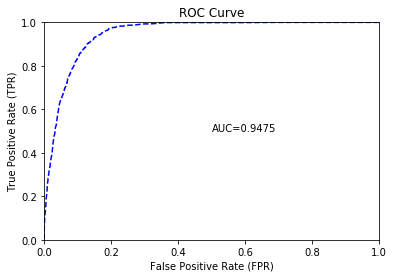

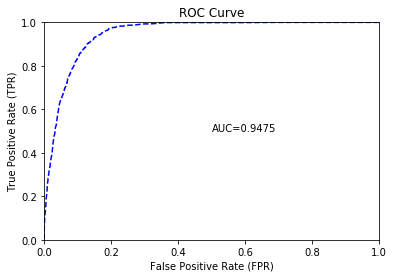

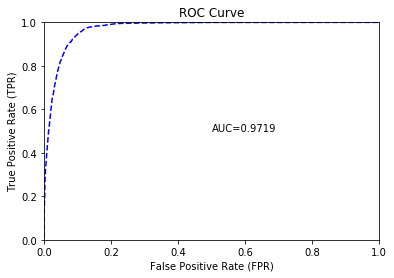

In [77]:
#Plot AUC-ROC
ensemble_test.plot()
ensemble_val.plot()
ensemble_train.plot()

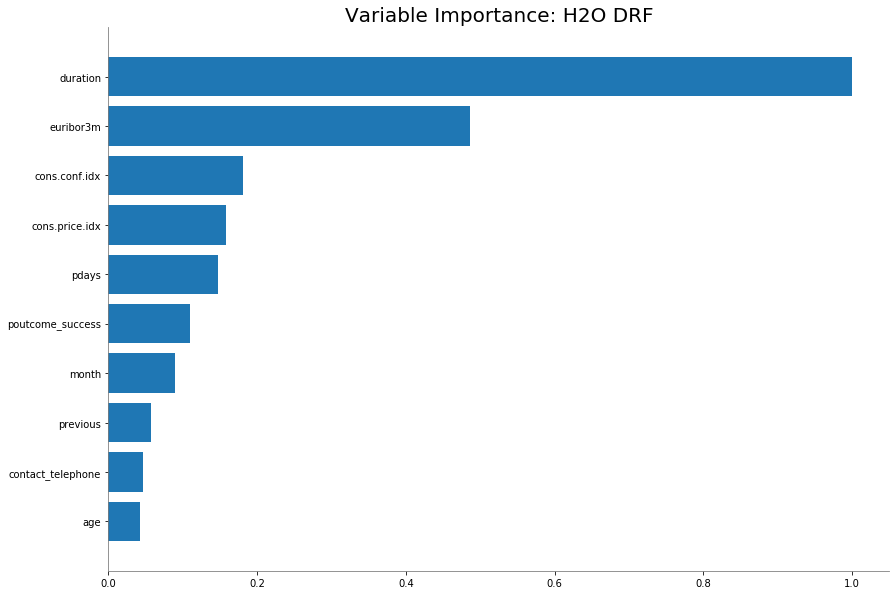

In [80]:
#Plot Variable Importance
rf.varimp_plot()